In [ ]:
!pip install qiskit[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.1/29.1 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.5/541.5 kB 52.2 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=b25ba268e2ae2578f6ffbb70b7a34db20b2c2d4e44f4e6338564ed5d4ef4f647
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2.py3-none-any.whl size=240

In [ ]:
!pip install qiskit qiskit-aer matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 92.7 MB/s eta 0:00:00


In [ ]:
!pip install qiskit-aer

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer # Corrected import for Aer
from qiskit.quantum_info import Statevector, DensityMatrix, state_fidelity
# All imports are classes or functions as expected.
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, amplitude_damping_error
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
psi = QuantumCircuit(1)
psi.h(0)
psi.p(np.pi/4, 0)

In [ ]:
!pip install qiskit qiskit-ibm-runtime matplotlib numpy

qiskit_runtime_service._discover_account:WARNING:2025-10-17 07:51:33,177: Loading account with the given token. A saved account will not be used.


Connected to real backend: ibm_brisbane
Running job on hardware. This may take some time.
Job ID: d3ovb25q5lhs73bb5hq0
Simulation counts: {'00000': 748, '00110': 326, '01110': 44, '00101': 13, '00111': 452, '00100': 22, '10110': 12, '01000': 70, '01111': 39, '10111': 14, '10000': 22, '00001': 103, '01001': 20, '00011': 25, '00010': 24, '11101': 1, '11010': 1, '01011': 10, '01010': 25, '01101': 10, '01100': 7, '10101': 9, '10010': 7, '10100': 10, '10011': 7, '11110': 1, '11100': 2, '10001': 14, '11011': 4, '11111': 1, '11001': 2, '11000': 3}
Ideal counts: {'00111': 141, '00000': 875, '00001': 150, '00110': 882}

Fidelity (measured on hardware): 0.7070
Circuit Diagram:


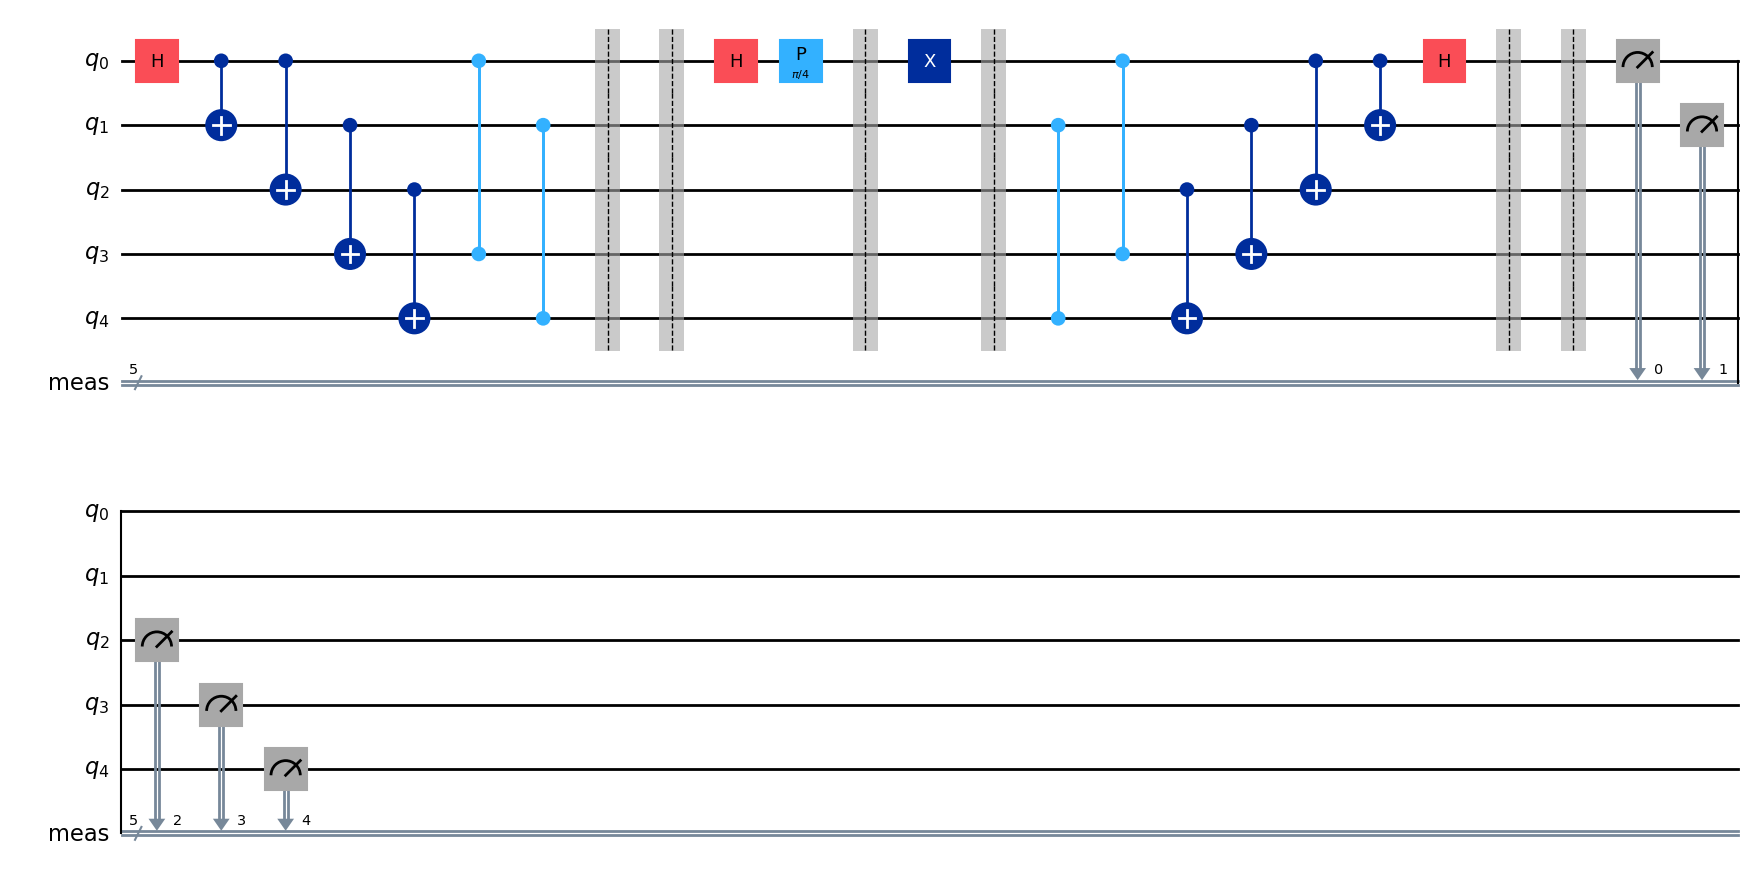


Transpiled Circuit Diagram for Hardware:


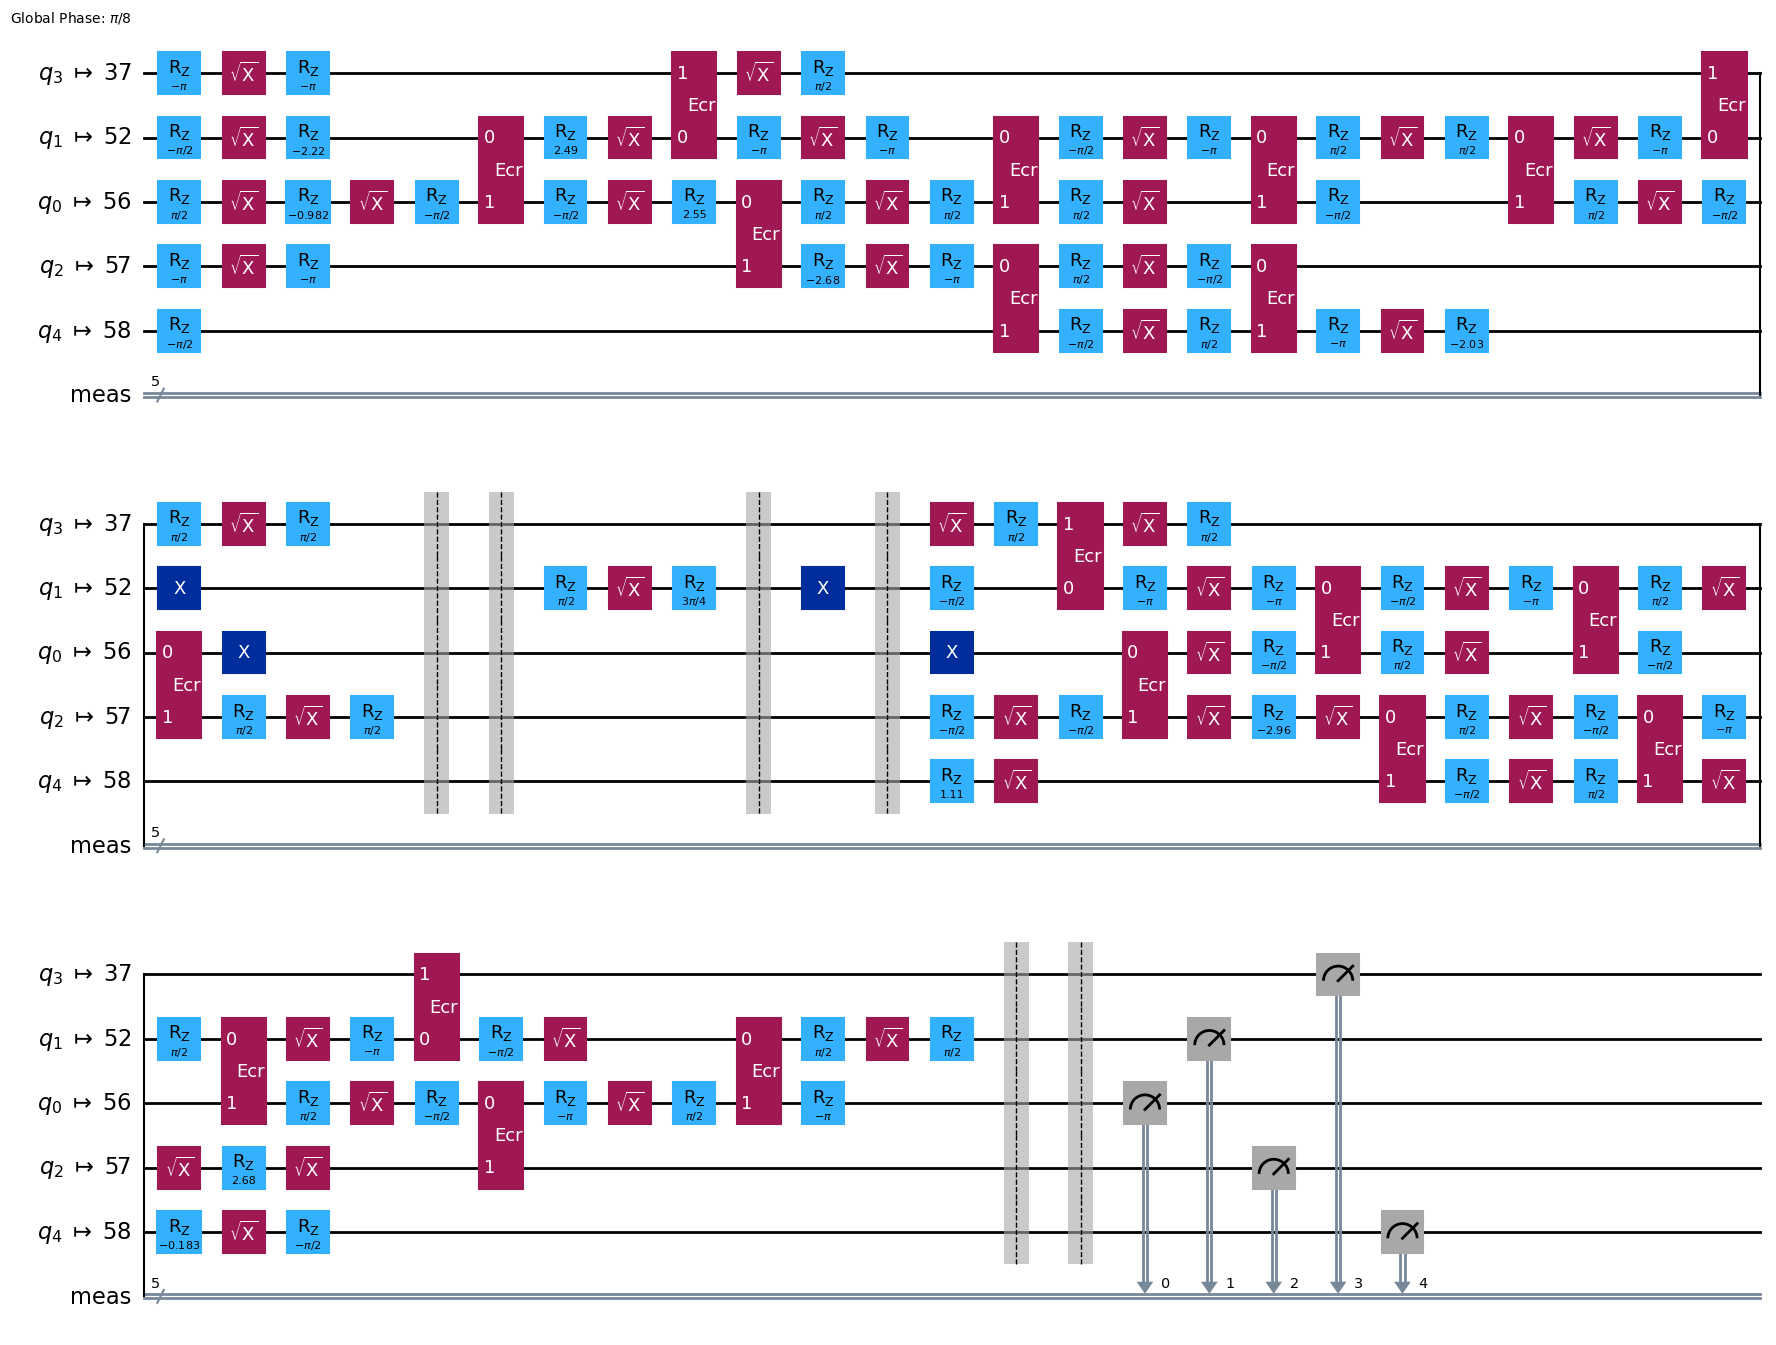

In [ ]:
# Step 1: Install & Import (Ensure qiskit-ibm-runtime and qiskit-aer are installed)
# !pip install qiskit qiskit-ibm-runtime matplotlib numpy
import os
from datetime import datetime
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector, DensityMatrix, state_fidelity
from qiskit.visualization import plot_bloch_multivector, plot_state_city
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, amplitude_damping_error
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# === Setup Output Directory ===
output_dir = "results"
os.makedirs(output_dir, exist_ok=True)
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# === Get API Key and Instance ===
# NOTE: The provided API token is likely invalid or expired.
# A valid token would be required to connect to real hardware.
try:
    # Explicitly providing all authentication details
    service = QiskitRuntimeService(
        channel="ibm_quantum_platform",
        token="00DFoDB0gn4jObDTg2E8Tfh11OC6fPC1o7NGrdZGuwAY",  # REPLACE with your actual API token
        instance="crn:v1:bluemix:public:quantum-computing:us-east:a/2c8b7074ab674a6b8f0f57323814d4a1:ebb8d7d8-0c0c-4b6c-95e9-f16820c648cb::"
    )
    backend = service.backend("ibm_brisbane")
    print(f"Connected to real backend: {backend.name}")
    run_on_hardware = True
except Exception as e:
    print(f"Failed to connect to IBM Quantum hardware. Using local AerSimulator instead: {e}")
    backend = AerSimulator()
    run_on_hardware = False

# --- Core Logic ---

# Step 2: Create Logical |ψ>
psi = QuantumCircuit(1)
psi.h(0)
psi.p(np.pi/4, 0)
psi_statevector = Statevector(psi)

# Step 3: Encoding Circuit
def encode_5_qubit():
    qc = QuantumCircuit(5, name='Encoder')
    qc.h(0)
    qc.cx(0, 1)
    qc.cx(0, 2)
    qc.cx(1, 3)
    qc.cx(2, 4)
    qc.cz(0, 3)
    qc.cz(1, 4)
    qc.barrier()
    return qc

# Step 5: Decoder
def decode_5_qubit():
    qc = QuantumCircuit(5, name='Decoder')
    qc.cz(1, 4)
    qc.cz(0, 3)
    qc.cx(2, 4)
    qc.cx(1, 3)
    qc.cx(0, 2)
    qc.cx(0, 1)
    qc.h(0)
    qc.barrier()
    return qc

# Create the full circuit structure (without final measurements for statevector sim)
qc_no_measure = QuantumCircuit(5)
qc_no_measure.compose(encode_5_qubit(), inplace=True)
qc_no_measure.barrier()
qc_no_measure.compose(psi, [0], inplace=True)
qc_no_measure.barrier()
qc_no_measure.x(0) # Simulate an error
qc_no_measure.barrier()
qc_no_measure.compose(decode_5_qubit(), inplace=True)

# Step 6: Full Circuit (with measurements for counts simulation)
qc = qc_no_measure.copy()
qc.measure_all()

# Step 4: Noise Model (updated for gate sizes)
p = 0.05
noise_model_counts = NoiseModel()
depolarizing_1q = depolarizing_error(p, 1)
depolarizing_2q = depolarizing_error(p, 2)
amp_damp = amplitude_damping_error(p)
noise_model_counts.add_all_qubit_quantum_error(depolarizing_1q, ['x'])
noise_model_counts.add_all_qubit_quantum_error(depolarizing_2q, ['cx', 'cz'])
noise_model_counts.add_all_qubit_quantum_error(amp_damp, ['h', 'p'])

# Step 7: Run Simulation
# ... (rest of your code remains the same) ...

# Step 7: Run Simulation
if run_on_hardware:
    print("Running job on hardware. This may take some time.")
    # Transpile for the real backend before running
    qc_transpiled = transpile(qc, backend=backend, optimization_level=3)

    sampler = Sampler(backend)
    job = sampler.run([qc_transpiled], shots=2048)
    print(f"Job ID: {job.job_id()}")
    result = job.result()
    # Access counts from the "meas" classical register in the V2 result object
    counts = result[0].data.meas.get_counts()
else:
    sim_counts = AerSimulator(noise_model=noise_model_counts)
    job = sim_counts.run(transpile(qc, sim_counts), shots=2048)
    result = job.result()
    counts = result.get_counts(qc)

print("Simulation counts:", counts)

# --- Fidelity calculation for real hardware results ---
# Step 8a: Get ideal counts from a noiseless simulator
ideal_sim = AerSimulator()
# The circuit `qc` includes the measurements
ideal_job = ideal_sim.run(transpile(qc, ideal_sim), shots=2048)
ideal_counts = ideal_job.result().get_counts(qc)
print("Ideal counts:", ideal_counts)

# Step 8b: Calculate Hellinger fidelity comparing ideal and hardware counts
from qiskit.quantum_info.analysis import hellinger_fidelity

if run_on_hardware:
    fidelity = hellinger_fidelity(ideal_counts, counts)
    print(f"\nFidelity (measured on hardware): {fidelity:.4f}")
else:
    # Existing fidelity calculation for local simulation
    sv_ideal = Statevector.from_instruction(qc_no_measure)
    qc_with_save = qc_no_measure.copy()
    qc_with_save.save_statevector(label='final_state')
    sim_noisy_sv = AerSimulator(method='statevector', noise_model=noise_model_counts)
    job_noisy_sv = sim_noisy_sv.run(transpile(qc_with_save, sim_noisy_sv))
    sv_noisy = job_noisy_sv.result().data()['final_state']
    fidelity = state_fidelity(sv_ideal, sv_noisy)
    print(f"\nFidelity (simulated): {fidelity:.4f}")

# Step 9: Visualization (only possible with statevector simulation)
if not run_on_hardware:
    dm_noisy = DensityMatrix(sv_noisy)
    plot_bloch_multivector(dm_noisy, figsize=(10, 5))
    plt.title("Bloch Multivector (Simulated)")
    plt.show()
    plot_state_city(dm_noisy, figsize=(8, 8))
    plt.title("State City (Simulated)")
    plt.show()

# ... (rest of your code for fidelity vs noise) ...

if not run_on_hardware:
    sv_ideal = Statevector.from_instruction(qc_no_measure)
    qc_with_save = qc_no_measure.copy()
    qc_with_save.save_statevector(label='final_state')
    sim_noisy_sv = AerSimulator(method='statevector', noise_model=noise_model_counts)
    job_noisy_sv = sim_noisy_sv.run(transpile(qc_with_save, sim_noisy_sv))
    sv_noisy = job_noisy_sv.result().data()['final_state']
    fidelity = state_fidelity(sv_ideal, sv_noisy)
    print(f"\nFidelity (simulated): {fidelity:.4f}")
    dm_noisy = DensityMatrix(sv_noisy)
    plot_bloch_multivector(dm_noisy, figsize=(10, 5))
    plt.title("Bloch Multivector (Simulated)")
    plt.show()
    plot_state_city(dm_noisy, figsize=(8, 8))
    plt.title("State City (Simulated)")
    plt.show()
if not run_on_hardware:
    fidelities = []
    noise_probs = np.linspace(0.01, 0.3, 10)
    for p in noise_probs:
        noise_model_loop = NoiseModel()
        depolarizing_1q_loop = depolarizing_error(p, 1)
        depolarizing_2q_loop = depolarizing_error(p, 2)
        noise_model_loop.add_all_qubit_quantum_error(depolarizing_1q_loop, ['x'])
        noise_model_loop.add_all_qubit_quantum_error(depolarizing_2q_loop, ['cx', 'cz'])

        qc_with_save_loop = qc_no_measure.copy()
        qc_with_save_loop.save_statevector(label='final_state')

        sim_noisy_sv_loop = AerSimulator(method='statevector', noise_model=noise_model_loop)
        job_noisy_sv_loop = sim_noisy_sv_loop.run(transpile(qc_with_save_loop, sim_noisy_sv_loop))
        sv_noisy_loop = job_noisy_sv_loop.result().data()['final_state']
        fidelities.append(state_fidelity(sv_ideal, sv_noisy_loop))

    plt.figure()
    plt.plot(noise_probs, fidelities, 'o-')
    plt.xlabel('Noise Probability')
    plt.ylabel('Fidelity')
    plt.title('5-Qubit Code: Fidelity vs Noise (Simulated)')
    plt.show()

print("Circuit Diagram:")
display(qc.draw('mpl'))
if run_on_hardware:
    print("\nTranspiled Circuit Diagram for Hardware:")
    display(qc_transpiled.draw('mpl'))


## Bonus Challange

qiskit_runtime_service._discover_account:WARNING:2025-10-17 07:39:52,425: Loading account with the given token. A saved account will not be used.


Failed to connect to IBM Quantum hardware. Using local AerSimulator instead: 'Unable to retrieve instances. Please check that you are using a valid API token.'
Running local simulation for logical error rate plot.


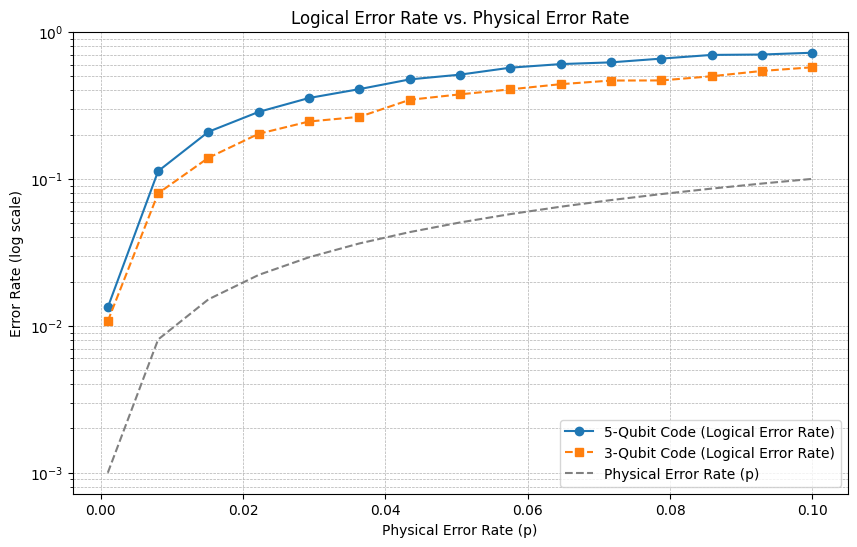



Circuit Diagram for 5-Qubit Code (Conceptual):


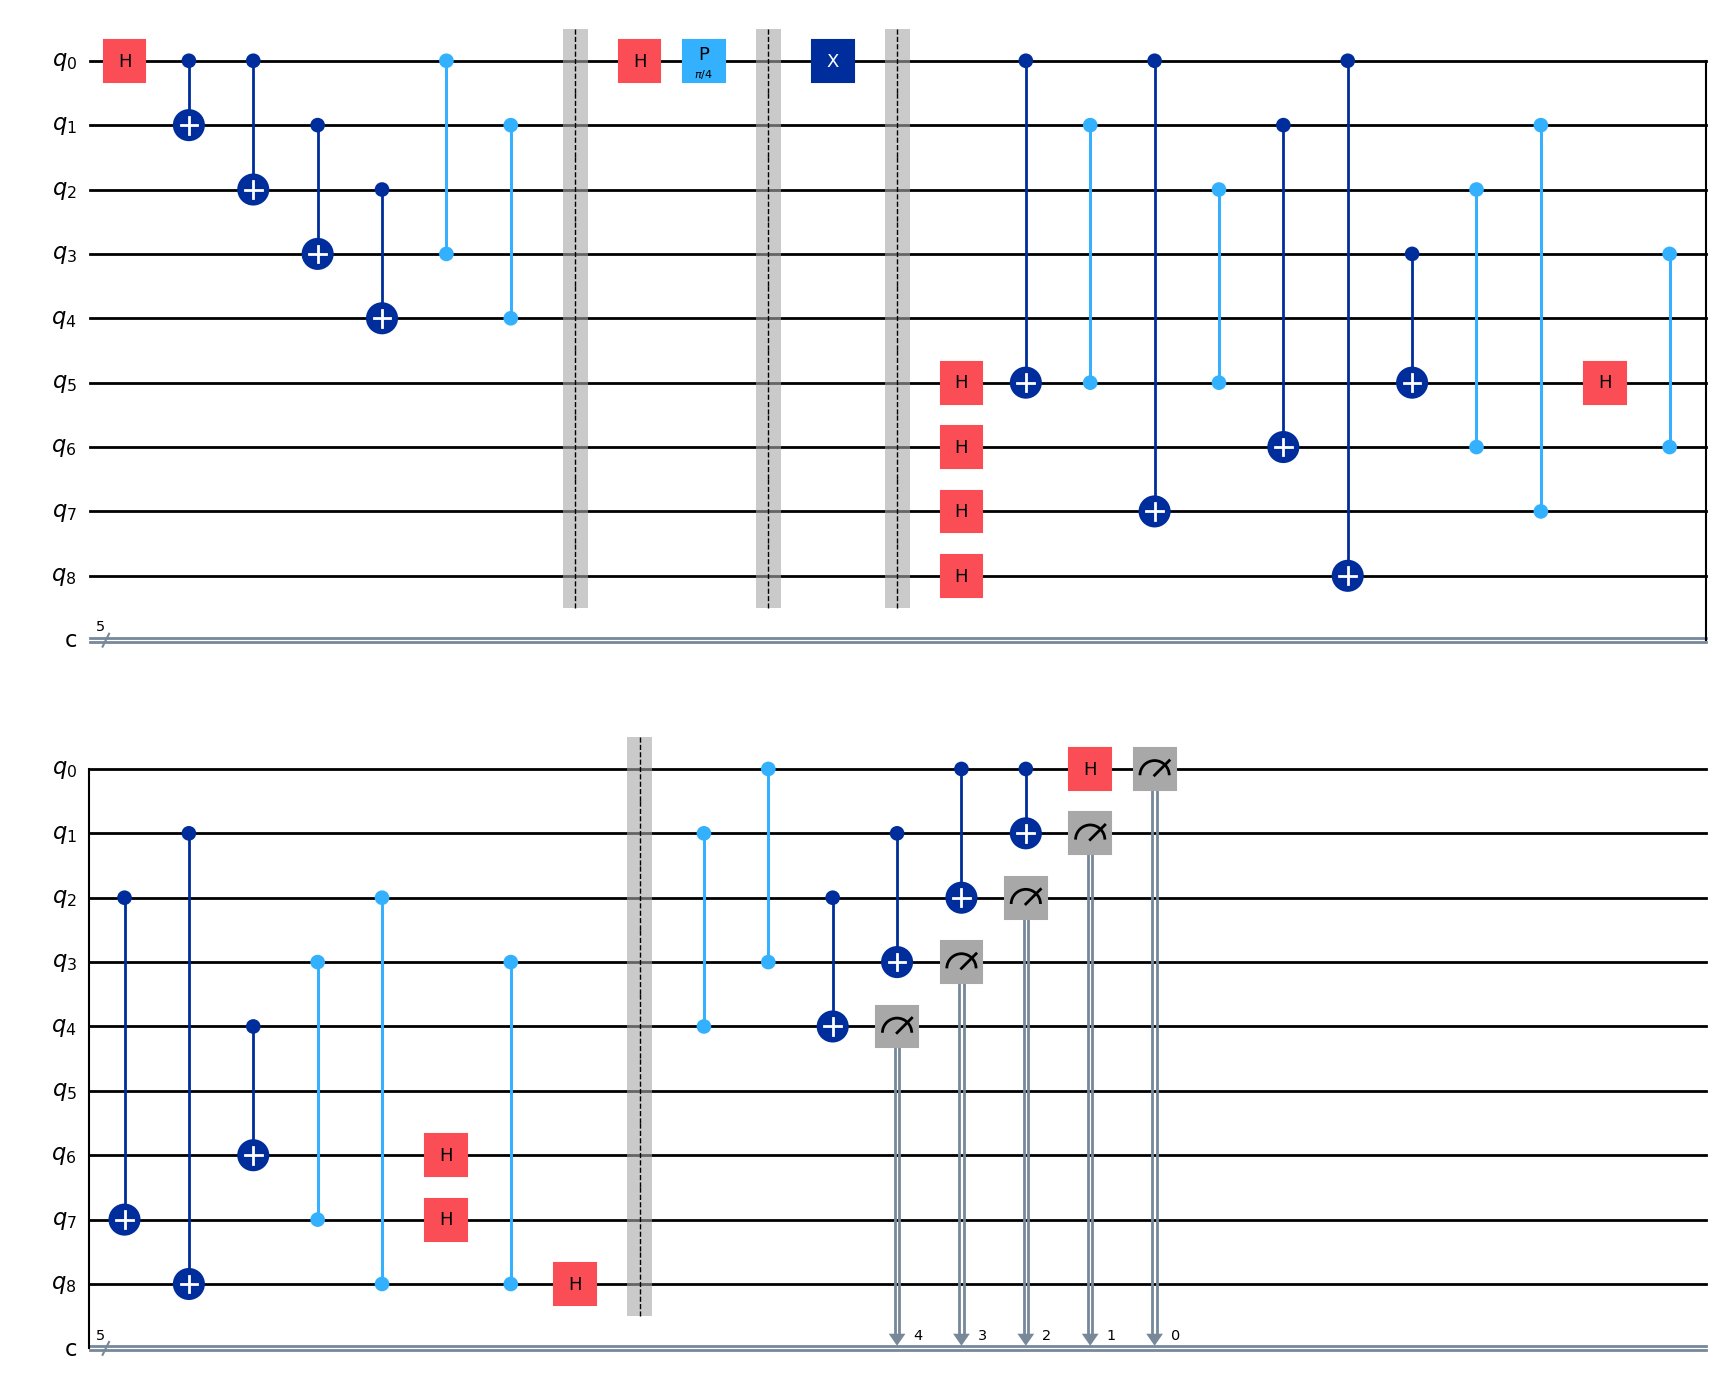


Circuit Diagram for 3-Qubit Code (Conceptual):


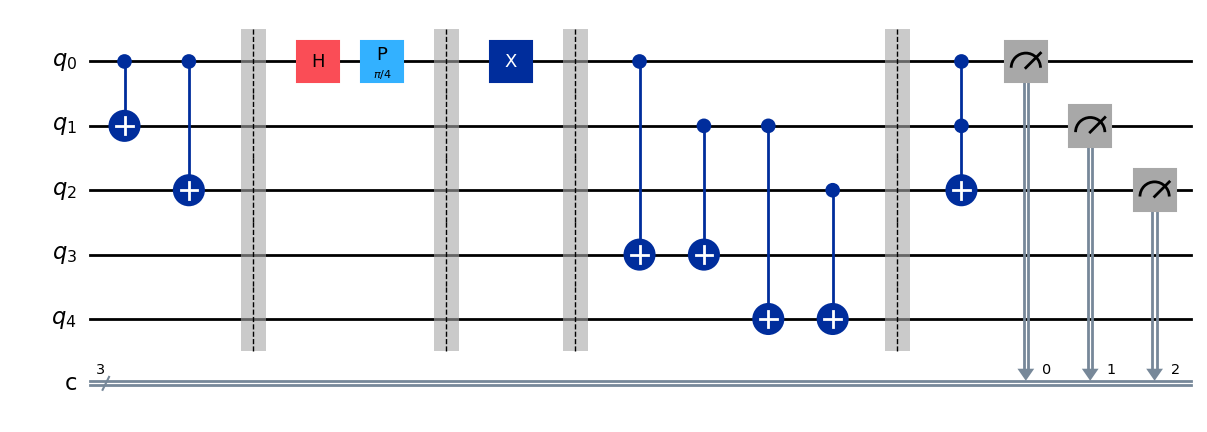

In [ ]:
# Step 1: Install & Import (Ensure qiskit-ibm-runtime and qiskit-aer are installed)
# %pip install --upgrade qiskit qiskit-ibm-runtime matplotlib numpy

import os
from datetime import datetime
from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister
from qiskit.quantum_info import Statevector, state_fidelity
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.quantum_info.analysis import hellinger_fidelity
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# === Setup Output Directory ===
output_dir = "results"
os.makedirs(output_dir, exist_ok=True)
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# === Get API Key and Instance ===
try:
    # --- IMPORTANT: REPLACE with your actual API token ---
    service = QiskitRuntimeService(
        channel="ibm_quantum_platform",
        token="YOUR_IBM_QUANTUM_TOKEN",
        instance="crn:v1:bluemix:public:quantum-computing:us-east:a/2c8b7074ab674a6b8f0f57323814d4a1:ebb8d7d8-0c0c-4b6c-95e9-f16820c648cb::"
    )
    backend = service.backend("ibm_brisbane")
    print(f"Connected to real backend: {backend.name}")
    run_on_hardware = True
except Exception as e:
    print(f"Failed to connect to IBM Quantum hardware. Using local AerSimulator instead: {e}")
    backend = AerSimulator()
    run_on_hardware = False

# --- Core Logic ---

# Create Logical |ψ>
psi = QuantumCircuit(1)
psi.h(0)
psi.p(np.pi/4, 0)
psi_statevector = Statevector(psi)

# --- 5-Qubit Code Logic ---
def encode_5_qubit():
    qc = QuantumCircuit(5)
    qc.h(0)
    qc.cx(0, 1)
    qc.cx(0, 2)
    qc.cx(1, 3)
    qc.cx(2, 4)
    qc.cz(0, 3)
    qc.cz(1, 4)
    return qc

def syndrome_5_qubit():
    """Circuit for extracting the 4 syndrome bits for the 5-qubit code."""
    # This circuit needs to be defined on 9 qubits (5 data + 4 ancilla)
    qc = QuantumCircuit(9, name="Syndrome_5_Qubits")

    # Qubit indices: 0-4 are data, 5-8 are ancilla
    data_qubits = [0, 1, 2, 3, 4]
    ancilla_qubits = [5, 6, 7, 8]

    # Measure stabilizers XZZXI, IXZZX, XIXZZ, XXIZZ
    # XZZXI
    qc.h(ancilla_qubits[0])
    qc.cx(data_qubits[0], ancilla_qubits[0])
    qc.cz(data_qubits[1], ancilla_qubits[0])
    qc.cz(data_qubits[2], ancilla_qubits[0])
    qc.cx(data_qubits[3], ancilla_qubits[0])
    qc.h(ancilla_qubits[0])

    # IXZZX
    qc.h(ancilla_qubits[1])
    qc.cx(data_qubits[1], ancilla_qubits[1])
    qc.cz(data_qubits[2], ancilla_qubits[1])
    qc.cz(data_qubits[3], ancilla_qubits[1])
    qc.cx(data_qubits[4], ancilla_qubits[1])
    qc.h(ancilla_qubits[1])

    # XIXZZ
    qc.h(ancilla_qubits[2])
    qc.cx(data_qubits[0], ancilla_qubits[2])
    qc.cz(data_qubits[1], ancilla_qubits[2])
    qc.cx(data_qubits[2], ancilla_qubits[2])
    qc.cz(data_qubits[3], ancilla_qubits[2])
    qc.h(ancilla_qubits[2])

    # XXIZZ
    qc.h(ancilla_qubits[3])
    qc.cx(data_qubits[0], ancilla_qubits[3])
    qc.cx(data_qubits[1], ancilla_qubits[3])
    qc.cz(data_qubits[2], ancilla_qubits[3])
    qc.cz(data_qubits[3], ancilla_qubits[3])
    qc.h(ancilla_qubits[3])

    return qc

def recovery_5_qubit():
    """Conceptual circuit for error recovery based on syndrome measurement."""
    return QuantumCircuit(5)

def decode_5_qubit():
    qc = QuantumCircuit(5)
    qc.cz(1, 4)
    qc.cz(0, 3)
    qc.cx(2, 4)
    qc.cx(1, 3)
    qc.cx(0, 2)
    qc.cx(0, 1)
    qc.h(0)
    return qc

# --- 3-Qubit Code Logic ---
def encode_3_qubit():
    qc = QuantumCircuit(3)
    qc.cx(0, 1)
    qc.cx(0, 2)
    return qc

def syndrome_3_qubit():
    """Circuit for extracting the 2 syndrome bits for the 3-qubit code."""
    # This circuit needs to be defined on 5 qubits (3 data + 2 ancilla)
    qc = QuantumCircuit(5, name="Syndrome_3_Qubits")

    # Qubit indices: 0-2 are data, 3-4 are ancilla
    data_qubits = [0, 1, 2]
    ancilla_qubits = [3, 4]

    # First stabilizer (ZZI)
    qc.cx(data_qubits[0], ancilla_qubits[0])
    qc.cx(data_qubits[1], ancilla_qubits[0])

    # Second stabilizer (IZZ)
    qc.cx(data_qubits[1], ancilla_qubits[1])
    qc.cx(data_qubits[2], ancilla_qubits[1])

    return qc

def decode_3_qubit():
    qc = QuantumCircuit(3)
    qc.ccx(0, 1, 2)
    return qc

# --- Core Logic with Bonus Challenges ---
if not run_on_hardware:
    print("Running local simulation for logical error rate plot.")

    fidelities_5 = []
    logical_errors_5 = []

    fidelities_3 = []
    logical_errors_3 = []

    noise_probs = np.linspace(0.001, 0.1, 15)

    for p in noise_probs:
        # --- 5-Qubit Code Simulation ---
        noise_model_5 = NoiseModel()
        noise_model_5.add_all_qubit_quantum_error(depolarizing_error(p, 1), ['u', 'p', 'h', 'x'])
        noise_model_5.add_all_qubit_quantum_error(depolarizing_error(p, 2), ['cx', 'cz'])

        qc_5 = QuantumCircuit(9, 5, name='QEC_5')
        qc_5.compose(encode_5_qubit(), range(5), inplace=True)
        qc_5.barrier()
        qc_5.compose(psi, [0], inplace=True)
        qc_5.barrier()
        # Introduce a simulated error
        qc_5.x(0)
        qc_5.barrier()
        qc_5.compose(syndrome_5_qubit(), range(9), inplace=True)
        qc_5.barrier()
        qc_5.compose(decode_5_qubit(), range(5), inplace=True)
        qc_5.measure(range(5), range(5))

        # --- Run Noisy Simulation ---
        sim_noisy_5 = AerSimulator(noise_model=noise_model_5)
        job_noisy_5 = sim_noisy_5.run(transpile(qc_5, sim_noisy_5), shots=2048)
        counts_noisy_5 = job_noisy_5.result().get_counts()

        # --- Run Ideal Simulation for Comparison ---
        ideal_sim = AerSimulator()
        ideal_job_5 = ideal_sim.run(transpile(qc_5, ideal_sim), shots=2048)
        ideal_counts_5 = ideal_job_5.result().get_counts()

        # Append fidelity and logical error rate
        fidelities_5.append(hellinger_fidelity(ideal_counts_5, counts_noisy_5))
        logical_errors_5.append(1 - hellinger_fidelity(ideal_counts_5, counts_noisy_5))

        # --- 3-Qubit Code Simulation ---
        noise_model_3 = NoiseModel()
        noise_model_3.add_all_qubit_quantum_error(depolarizing_error(p, 1), ['u', 'h', 'x'])
        noise_model_3.add_all_qubit_quantum_error(depolarizing_error(p, 2), ['cx'])

        qc_3 = QuantumCircuit(5, 3, name='QEC_3')
        qc_3.compose(encode_3_qubit(), range(3), inplace=True)
        qc_3.barrier()
        qc_3.compose(psi, [0], inplace=True)
        qc_3.barrier()
        # Introduce a simulated error
        qc_3.x(0)
        qc_3.barrier()
        qc_3.compose(syndrome_3_qubit(), range(5), inplace=True)
        qc_3.barrier()
        qc_3.compose(decode_3_qubit(), range(3), inplace=True)
        qc_3.measure(range(3), range(3))

        # --- Run Noisy Simulation ---
        sim_noisy_3 = AerSimulator(noise_model=noise_model_3)
        job_noisy_3 = sim_noisy_3.run(transpile(qc_3, sim_noisy_3), shots=2048)
        counts_noisy_3 = job_noisy_3.result().get_counts()

        # --- Run Ideal Simulation for Comparison ---
        ideal_job_3 = ideal_sim.run(transpile(qc_3, ideal_sim), shots=2048)
        ideal_counts_3 = ideal_job_3.result().get_counts()

        # Append fidelity and logical error rate
        fidelities_3.append(hellinger_fidelity(ideal_counts_3, counts_noisy_3))
        logical_errors_3.append(1 - hellinger_fidelity(ideal_counts_3, counts_noisy_3))

    # --- Plotting Logical Error Rate vs Physical Error Rate ---
    plt.figure(figsize=(10, 6))
    plt.plot(noise_probs, logical_errors_5, 'o-', label='5-Qubit Code (Logical Error Rate)')
    plt.plot(noise_probs, logical_errors_3, 's--', label='3-Qubit Code (Logical Error Rate)')
    plt.plot(noise_probs, noise_probs, '--', color='gray', label='Physical Error Rate (p)')
    plt.xlabel('Physical Error Rate (p)')
    plt.ylabel('Error Rate (log scale)')
    plt.yscale('log')
    plt.title('Logical Error Rate vs. Physical Error Rate')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

else:
    print("\nExecuting single run on real hardware (no plot generated).")
    # --- 5-Qubit Code Execution on Hardware ---
    qc_5_hardware = QuantumCircuit(9, 5, name='QEC_5')
    qc_5_hardware.compose(encode_5_qubit(), range(5), inplace=True)
    qc_5_hardware.barrier()
    qc_5_hardware.compose(psi, [0], inplace=True)
    qc_5_hardware.barrier()
    qc_5_hardware.x(0) # Simulate an error
    qc_5_hardware.barrier()
    qc_5_hardware.compose(syndrome_5_qubit(), range(9), inplace=True)
    qc_5_hardware.barrier()
    qc_5_hardware.compose(decode_5_qubit(), range(5), inplace=True)
    qc_5_hardware.measure(range(5), range(5))

    qc_transpiled = transpile(qc_5_hardware, backend=backend, optimization_level=3)
    sampler = Sampler(backend)
    job = sampler.run([qc_transpiled], shots=2048)
    print(f"Job ID: {job.job_id()}")
    result = job.result()
    counts = result.data.meas.get_counts()

    # Get ideal counts for hardware fidelity comparison
    ideal_sim = AerSimulator()
    ideal_job = ideal_sim.run(transpile(qc_5_hardware, ideal_sim), shots=2048)
    ideal_counts = ideal_job.result().get_counts(qc_5_hardware)

    fidelity = hellinger_fidelity(ideal_counts, counts)
    print("Ideal counts:", ideal_counts)
    print("Hardware counts:", counts)
    print(f"\nFidelity (measured on hardware): {fidelity:.4f}")

    print("\nTranspiled Circuit Diagram for Hardware:")
    display(qc_transpiled.draw('mpl'))

print("\n\nCircuit Diagram for 5-Qubit Code (Conceptual):")
display(qc_5.draw('mpl'))
print("\nCircuit Diagram for 3-Qubit Code (Conceptual):")
display(qc_3.draw('mpl'))
